In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import arange
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import probplot
from scipy.stats import linregress

import warnings
warnings.simplefilter('ignore')

In [2]:
## Calulcating metrics
def calculate_metrics(df, crop_names, y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test,y_pred)
    y_test_avg = pd.DataFrame(y_test).mean().iloc[0]
    y_pred_avg = pd.DataFrame(y_pred).mean().iloc[0]
    df.loc[crop_names] = [mae, mse, rmse, mape, r2, y_test_avg, y_pred_avg]


In [3]:
fao_data = pd.read_csv("latest_2504.csv", index_col='Unnamed: 0')

fao_data

,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,...,Rodenticides – Other-3,Herbicides – Bipiridils-1,Herbicides – Bipiridils-2,Herbicides – Bipiridils-3,Herbicides – Sulfonyl ureas-1,Herbicides – Sulfonyl ureas-2,Herbicides – Sulfonyl ureas-3,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2,Rodenticides – Anti-coagulants-3
1990-01-01,255388.810691,141418.674834,331000.587974,Apples,25.331101,274.402429,605.783965,649.217529,1829.067462,916.135858,...,81.037938,109.688023,109.687327,109.686628,259.436250,259.436710,259.437173,0.668353,0.669622,0.670896
1990-01-01,256551.000001,142347.000001,332132.000001,Apricots,1.582001,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.037938,109.688717,109.687327,109.686628,259.435792,259.436710,259.437173,5.000001,0.669622,0.670896
1990-01-01,256551.000001,142347.000001,332132.000001,Cherries,4.086701,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.037938,110.000001,109.688717,109.686628,259.230001,259.435792,259.437173,5.000001,5.000001,0.670896
1990-01-01,256551.000001,142347.000001,332132.000001,Currants,6.042201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.037818,110.000001,110.000001,109.688717,259.230001,259.230001,259.435792,5.000001,5.000001,5.000001
1990-01-01,256551.000001,142347.000001,332132.000001,Gooseberries,5.812001,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.020001,110.000001,110.000001,110.000001,259.230001,259.230001,259.230001,5.000001,5.000001,5.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,256551.000001,142347.000001,332132.000001,Sunflower seed,2.421201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,86.020001,110.000001,110.000001,29.000001,259.230001,259.230001,290.230001,0.410001,0.410001,0.410001
2020-01-01,149944.000001,86763.000001,358986.000001,Hop cones,3.519101,259.810001,367.000001,793.830001,1968.210001,142.000001,...,81.020001,110.000001,110.000001,110.000001,259.230001,259.230001,259.230001,0.410001,0.410001,0.410001
2020-01-01,256551.000001,142347.000001,332132.000001,Rape or colza seed,4.693201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.020001,26.000001,110.000001,110.000001,263.230001,259.230001,259.230001,0.100001,0.410001,0.410001
2020-01-01,256551.000001,142347.000001,332132.000001,Soya beans,2.281201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.020001,110.000001,26.000001,110.000001,259.230001,263.230001,259.230001,0.100001,0.100001,0.410001


In [4]:
x_vals = ['Nutrient nitrogen N (total) - tonnes',
 'Nutrient phosphate P2O5 (total) - tonnes',
 'Nutrient potash K2O (total) - tonnes',
 'Fung & Bact – Benzimidazoles',
 'Fung & Bact – Diazines, morpholines',
 'Fung & Bact – Dithiocarbamates',
 'Fung & Bact – Inorganics',
 'Fung & Bact – Other',
 'Fung & Bact – Triazoles, diazoles',
 'Herbicides – Amides',
 'Herbicides – Carbamates',
 'Herbicides – Dinitroanilines',
 'Herbicides – Other',
 'Herbicides – Phenoxy hormone products',
 'Herbicides – Triazines',
 'Herbicides – Urea derivates',
 'Insecticides – Botanical products and biologicals',
 'Insecticides – Carbamates',
 'Insecticides – Organo-phosphates',
 'Insecticides – Other',
 'Insecticides – Pyrethroids',
 'Mineral Oils',
 'Plant Growth Regulators',
 'Rodenticides – Other',
 'Herbicides – Bipiridils',
 'Herbicides – Sulfonyl ureas',
 'Rodenticides – Anti-coagulants',
 'Nutrient nitrogen N (total) - tonnes-1',
 'Nutrient nitrogen N (total) - tonnes-2',
 'Nutrient nitrogen N (total) - tonnes-3',
 'Nutrient phosphate P2O5 (total) - tonnes-1',
 'Nutrient phosphate P2O5 (total) - tonnes-2',
 'Nutrient phosphate P2O5 (total) - tonnes-3',
 'Nutrient potash K2O (total) - tonnes-1',
 'Nutrient potash K2O (total) - tonnes-2',
 'Nutrient potash K2O (total) - tonnes-3',
 'Yield(tonnes/ha)-1',
 'Yield(tonnes/ha)-2',
 'Yield(tonnes/ha)-3',
 'Fung & Bact – Benzimidazoles-1',
 'Fung & Bact – Benzimidazoles-2',
 'Fung & Bact – Benzimidazoles-3',
 'Fung & Bact – Diazines, morpholines-1',
 'Fung & Bact – Diazines, morpholines-2',
 'Fung & Bact – Diazines, morpholines-3',
 'Fung & Bact – Dithiocarbamates-1',
 'Fung & Bact – Dithiocarbamates-2',
 'Fung & Bact – Dithiocarbamates-3',
 'Fung & Bact – Inorganics-1',
 'Fung & Bact – Inorganics-2',
 'Fung & Bact – Inorganics-3',
 'Fung & Bact – Other-1',
 'Fung & Bact – Other-2',
 'Fung & Bact – Other-3',
 'Fung & Bact – Triazoles, diazoles-1',
 'Fung & Bact – Triazoles, diazoles-2',
 'Fung & Bact – Triazoles, diazoles-3',
 'Herbicides – Amides-1',
 'Herbicides – Amides-2',
 'Herbicides – Amides-3',
 'Herbicides – Carbamates-1',
 'Herbicides – Carbamates-2',
 'Herbicides – Carbamates-3',
 'Herbicides – Dinitroanilines-1',
 'Herbicides – Dinitroanilines-2',
 'Herbicides – Dinitroanilines-3',
 'Herbicides – Other-1',
 'Herbicides – Other-2',
 'Herbicides – Other-3',
 'Herbicides – Phenoxy hormone products-1',
 'Herbicides – Phenoxy hormone products-2',
 'Herbicides – Phenoxy hormone products-3',
 'Herbicides – Triazines-1',
 'Herbicides – Triazines-2',
 'Herbicides – Triazines-3',
 'Herbicides – Urea derivates-1',
 'Herbicides – Urea derivates-2',
 'Herbicides – Urea derivates-3',
 'Insecticides – Botanical products and biologicals-1',
 'Insecticides – Botanical products and biologicals-2',
 'Insecticides – Botanical products and biologicals-3',
 'Insecticides – Carbamates-1',
 'Insecticides – Carbamates-2',
 'Insecticides – Carbamates-3',
 'Insecticides – Organo-phosphates-1',
 'Insecticides – Organo-phosphates-2',
 'Insecticides – Organo-phosphates-3',
 'Insecticides – Other-1',
 'Insecticides – Other-2',
 'Insecticides – Other-3',
 'Insecticides – Pyrethroids-1',
 'Insecticides – Pyrethroids-2',
 'Insecticides – Pyrethroids-3',
 'Mineral Oils-1',
 'Mineral Oils-2',
 'Mineral Oils-3',
 'Plant Growth Regulators-1',
 'Plant Growth Regulators-2',
 'Plant Growth Regulators-3',
 'Rodenticides – Other-1',
 'Rodenticides – Other-2',
 'Rodenticides – Other-3',
 'Herbicides – Bipiridils-1',
 'Herbicides – Bipiridils-2',
 'Herbicides – Bipiridils-3',
 'Herbicides – Sulfonyl ureas-1',
 'Herbicides – Sulfonyl ureas-2',
 'Herbicides – Sulfonyl ureas-3',
 'Rodenticides – Anti-coagulants-1',
 'Rodenticides – Anti-coagulants-2',
 'Rodenticides – Anti-coagulants-3']

In [5]:
cat_names = fao_data['Category'].unique()
cat_names

array(['Fruits and Nuts', 'Vegetables and Legumes', 'Cereals',
       'Industrial_crops'], dtype=object)

In [6]:
quality_metrics = ['SVR_MAE', 'SVR_MSE', 'SVR_RMSE', 'SVR_MAPE', 'SVR_r2_score', 'y_test_avg', 'y_pred_avg']
error_df = pd.DataFrame(columns = quality_metrics, index = cat_names)
#display(error_df)

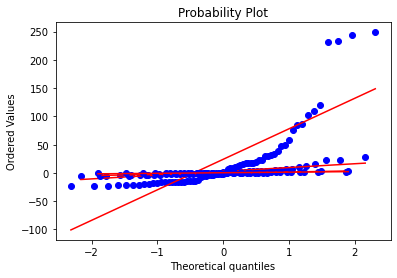

In [21]:
mmsc_X = MinMaxScaler()
for cat in cat_names:
    crop_df = fao_data[fao_data['Category'] == cat]
    x = mmsc_X.fit_transform(crop_df[x_vals])
    y = crop_df[['Yield(tonnes/ha)']]
  
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
   
    regressor = SVR(kernel='rbf')
    regressor.fit(x_train, y_train)


    #prediction of new value
    y_pred = regressor.predict(x_test)
    # model evaluation per crop
    calculate_metrics(error_df, cat , y_test, y_pred) 
   # display(pd.DataFrame(x))
    # testing normaility of data per crop
    residuals = y_test['Yield(tonnes/ha)'] - regressor.predict(x_test)
    probplot(residuals, dist="norm", plot=plt) 
    # checking linearity per crop
    # Loop over each independent variable and plot against the dependent variable

    # for col in range(0, 28):
    #     X = pd.DataFrame(x)[col]
    #     slope, intercept, rvalue, pvalue, stderr = linregress(X, y)
    #     plt.scatter(X, y, alpha=0.5)
    #     plt.plot(X, slope * X + intercept, color='red')
    #     plt.title(f'{col} vs.  Yield for {crop}')
    #     plt.xlabel(col)
    #     plt.ylabel('Yield')
    #     plt.show()


In [22]:
error_df

,SVR_MAE,SVR_MSE,SVR_RMSE,SVR_MAPE,SVR_r2_score,y_test_avg,y_pred_avg
Fruits and Nuts,4.805228,61.141875,7.819327,0.7336,-0.142936,8.822054,5.947874
Vegetables and Legumes,37.959871,4679.973437,68.410331,3.795856,-0.129636,47.336589,23.277255
Cereals,1.452604,4.690135,2.165672,0.647938,0.144763,6.813392,7.280942
Industrial_crops,0.731369,1.135808,1.065743,0.194541,0.000521,3.349255,2.980187
